# Overwiev and Exploration of Dataset
Robin Feldmann


<hr/>

## 00 Introduction 

This Notebook shows the steps done to prepare and explore the dataset. This aims to make everything reproducible.
To see implementation details, see ./src folder. 
Code that is commented out, should not be run, either because it is very computional heavy or because it has sideeffects that should not be repeated.




## 01 Data Source and Information about Provider

This section answers following questions:

    1. Where does the dataset come from?
    2. Who collected the dataset?
    3. How was the dataset collected?
    4. Was the dataset prepared after downloading?
    5. Informations about files

### 1. Where does the dataset come from?
The dataset was downloaded from the online platform [Kaggle](https://www.kaggle.com/). Kaggle is an online community for data science and machine learning (ML) enthusiasts. It is a top learning tool for novices and pros, with realistic practice problems to sharpen your data science skills.

Owned by Google, it is currently the world’s largest crowdsourced web platform for data scientists and ML practitioners. Thus, Kaggle gives you access to several professionals in your field that you can brainstorm, compete, and solve real-life problems with. [[ "A Beginner's Guide to Kaggle for Data Science"](https://www.makeuseof.com/beginners-guide-to-kaggle/). MUO. 2023-04-17. Retrieved 2023-06-10.]

The dataset can be downloaded for free and with no restrictions here: [Link to Website](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data).

### 2. Who collected the dataset?
The dataset was published on Kaggle by User [BwandoWando](https://www.kaggle.com/bwandowando). 
There are not many additional information available on BwandoWando.

### 3. How was the dataset collected?
Couldn't find any information about how the dataset was collected.

###  4. Was the dataset prepared after downloading?


The dataset was downloaded on 15.10.23.
After the dataset was downloaded, all the files were unzipped. Data structure of the downlaoded directory was like this:

archive/{alot_of_files.csv} \
archive/UkraineWar/UkraineWar/{alot_of_files.csv}


In [1]:
from src.prepare_files_01 import move_files_into_one_dir, split_csv_by_date, merge_splitted_files, rename_files

PATH_TO_ARCHIVE = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive"

All files from the nested directory were moved into the same level.
Files containing data of for multiples days were splitted.
Files that were splitted over multiples files for a single day were merged.
Files were renamemd to format YYYYMMDD.csv.

In [ ]:
#move_files_into_one_dir(PATH_TO_ARCHIVE)
#split_csv_by_date(PATH_TO_ARCHIVE)
#merge_splitted_files(PATH_TO_ARCHIVE)
#rename_files(PATH_TO_ARCHIVE)

### 5. Information about files

In [2]:
from src.prepare_files_01 import print_folder_stats

print_folder_stats(PATH_TO_ARCHIVE)

Number of files: 476
First date: 20220224.csv, Last date: 20230614.csv
Average file size: 95.06 in mb


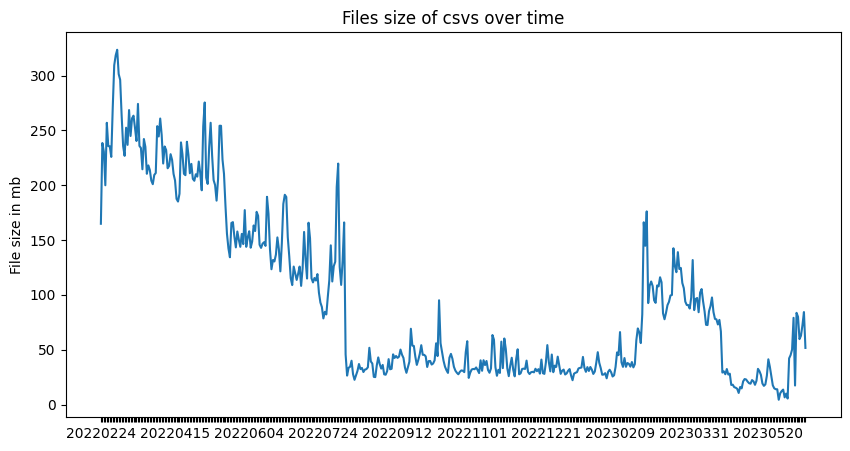

In [3]:
from src.prepare_files_01 import plot_file_sizes

plot_file_sizes(PATH_TO_ARCHIVE)

## 02 First Exploration

### Look at single examples

In [30]:
import pandas as pd
df_example = pd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/20230611.csv",  lineterminator='\n')
#print(df_example.columns)
example = df_example.sample(1).iloc[0]
print(df_example.columns)
print(f"user id {example['userid']}")
print(f"username {example['username']}")
print(f"tweetcreatedts {example['tweetcreatedts']}")
print(f"language {example['language']}")
print(f"location {example['location']}")
print(f"text {example['text']}")

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'userid',
       'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts',
       'is_duplicate'],
      dtype='object')
user id 1651920181654847488
username DiazFerrio73620
tweetcreatedts 2023-06-11 22:17:04
language es
location Cuba
text 😱Ataques sónicos en la Habana.
🤔Bases nucleares de #Rusia en #Cuba.
⁉️Y AHORA PARA REMATAR ESTO⁉️👇
🤦Bases de espionaje chino en #Cuba.
Ante esta #FakeNews me sumo al llamado de la Coalición de Alianza Martina en los EEUU
#YoNoCreo

This section aims to provide a generall understanding of the unprocessed data. Folowing questions aim to be answered:

    1. How many tweets are provided?
    2. Which timespan is covered by the data?
    2. How many tweets are provided distributed over time?
    3. How many tweets are provided in each language?
    4. How many tweets are provided in each language distributed over time?
    5. How many tweets are duplicated on the same day?
    6. How many tweets are duplicated on the same day distributed over time?
    7. How many tweets are duplicated on the same day distributed over languages?

Those insights are necessary to prepare for further processing steps like deciding which data to keep and or translate.
Also those informations can be used later on to check if changes on the dataset were correct.

<hr/>

### Data Preparation and Aggregation

Dataset is too big to load it into the ram at once. So every single csv file will be aggregated to a single row in an overview dataframe.
For every csv following data will be extracted:

    1. Number of rows.
    2. Number of rows with "is_retweet" flag true or beeing duplicated in the same csv.
    3. Date.
    4. Number of unique users.
    5. For every language the number of tweets in that language.
    6. For every language the number of duplicated or "is_retweet" tweets.
    
This DataFrame is then saved in AggregatedData/agg.csv.
For more implementation details see ./src/first_exploration_02.py.

In [68]:
from src.first_exploration_02 import aggregate_dataframe
from src.utility import aggregate_data
import pandas as pd

path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
agg_path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/agg.csv"

aggregate_data(path_data, agg_path, aggregate_dataframe)
df_agg = pd.read_csv(agg_path)

  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [19:39<00:00,  2.48s/it]


In the following cell are all languages that are in the dataset. For simplicity reasons and for limitation of computational effort i think i will limit the languages to top languages, as shown in selected languages. There will be a bigger chapter on the reasons for this decision later on.

In [69]:
import numpy as np

languages = np.array(['am', 'ar', 'bg', 'bn', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el',
       'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'gu', 'hi', 'ht', 'hu', 'hy',
       'in', 'is', 'it', 'iw', 'ja', 'ka', 'kn', 'ko', 'lt', 'lv', 'ml', 'mr',
       'my', 'ne', 'nl', 'no', 'or', 'pa', 'pl', 'ps', 'pt', 'ro', 'ru', 'si',
       'sl', 'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'und', 'ur', 'vi',
       'zh','sd', 'km', 'lo', 'ug', 'bo'])

selected_languages = np.array(['en','de','fr','it','es','uk','ru'])

In this section are some statistics about the dataset just printed out.

In [70]:
from src.first_exploration_02 import exploration_in_numbers

exploration_in_numbers(df_agg)

Tweets total: 70885956.
First date: 2022-02-24.  Last date: 2023-06-14. Unique dates: 476.
Tweets duplicated or retweeted on the same day total: 40775304. Tweets duplicated on the same day percent: 57.52%
Tweets not duplicated or retweeted on the same day total: 30110652
Tweets in a single file on average: 148920.0756302521, with variance: 17414183791.64479 and max: 567745 and min: 6892 


Print some tabular infornation about all the languages. Select all languages or selected_languages to see different aggregations. Note that in languages the second most common language "und" stands for undefined. In selected languages all other languages and undefined are aggregated into "others". Row "dupl" means the percentage of duplicated tweets in that particular language.

In [71]:
from src.first_exploration_02 import languages_tabular

languages_tabular(df_agg, selected_languages)
languages_tabular(df_agg, languages)

Language   |           Count |       Freq |     Dupl % 
en         |        44416876 |     62.66% |     62.91%  
others     |         9920771 |     14.00% |     35.42%  
de         |         3872212 |      5.46% |     53.51%  
fr         |         3795086 |      5.35% |     66.05%  
it         |         3262053 |      4.60% |     58.51%  
es         |         3113760 |      4.39% |     60.38%  
uk         |         1541110 |      2.17% |     35.42%  
ru         |          964087 |      1.36% |     42.04%  
Language   |           Count |       Freq |     Dupl % 
en         |        44416876 |     62.66% |     62.91%  
und        |         3898230 |      5.50% |     24.57%  
de         |         3872212 |      5.46% |     53.51%  
fr         |         3795086 |      5.35% |     66.05%  
it         |         3262053 |      4.60% |     58.51%  
es         |         3113760 |      4.39% |     60.38%  
uk         |         1541110 |      2.17% |     35.42%  
ru         |          964087 |   

A bar h graph shows statistics for selected languages. Not selected are summed in others. Percentage on the right shows percentage of all tweets. Number in the middle is count of tweets. Red and blue bars show the percentage of duplicated and not duplicated.

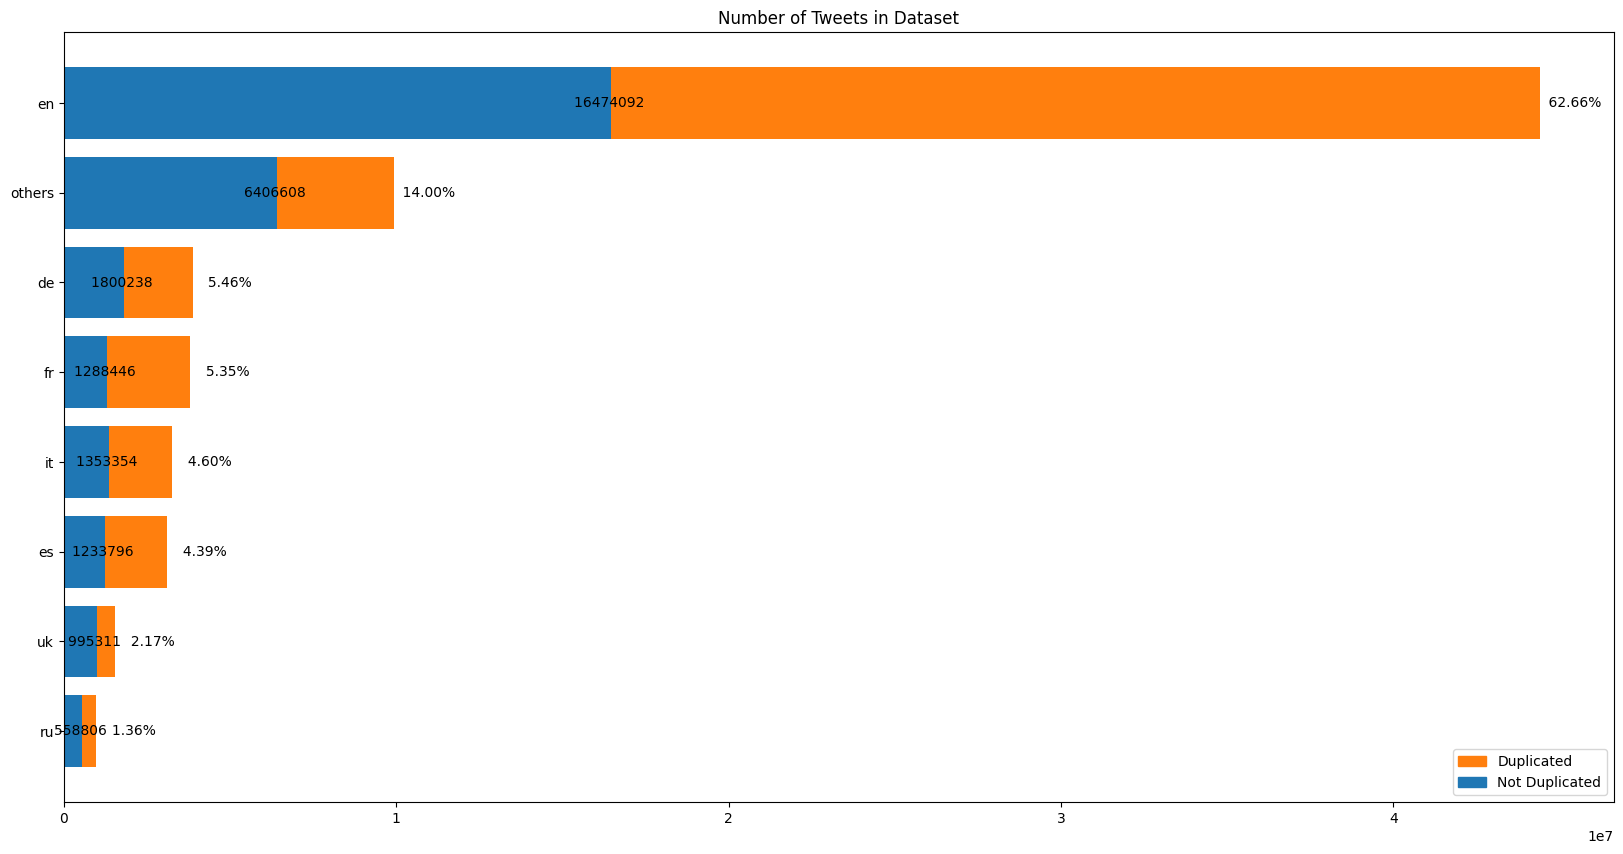

In [5]:
import src.first_exploration_02
from src.first_exploration_02 import languages_bar_h
import importlib
importlib.reload(src.first_exploration_02)
languages_bar_h(df_agg, selected_languages) 

Percentage of each language shown as a Pi Graph. Once with duplicates and once without.

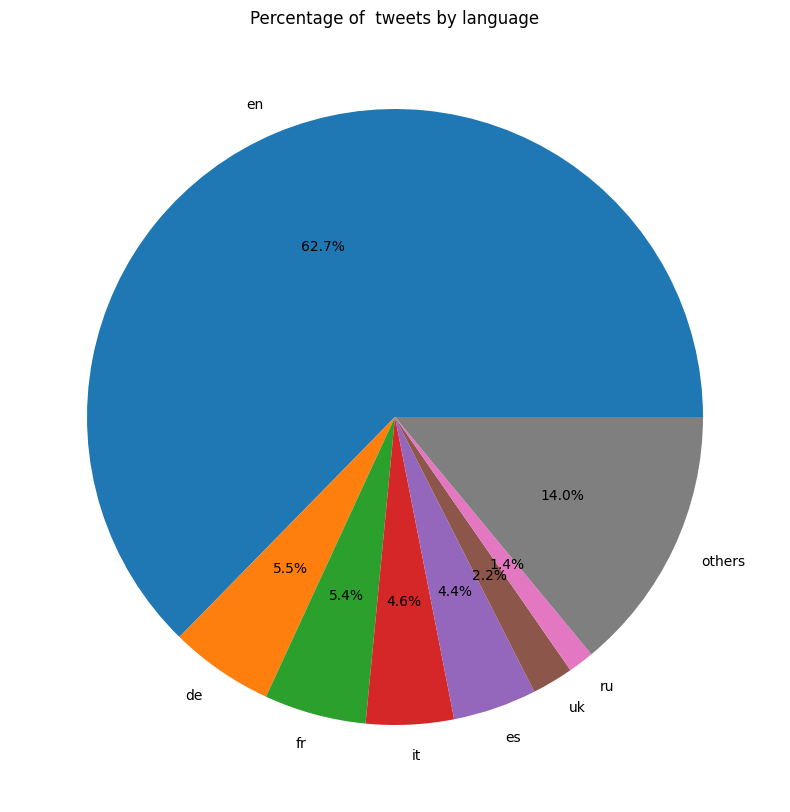

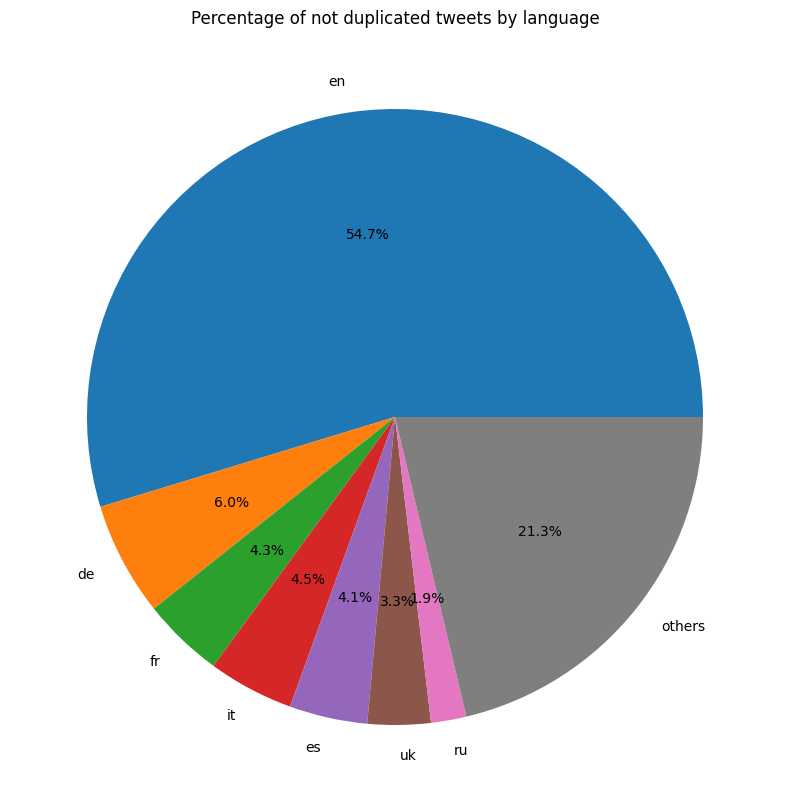

In [6]:
from src.first_exploration_02 import pi_lang_freq


pi_lang_freq(df_agg, selected_languages, not_dupl=False)
pi_lang_freq(df_agg, selected_languages, not_dupl=True)


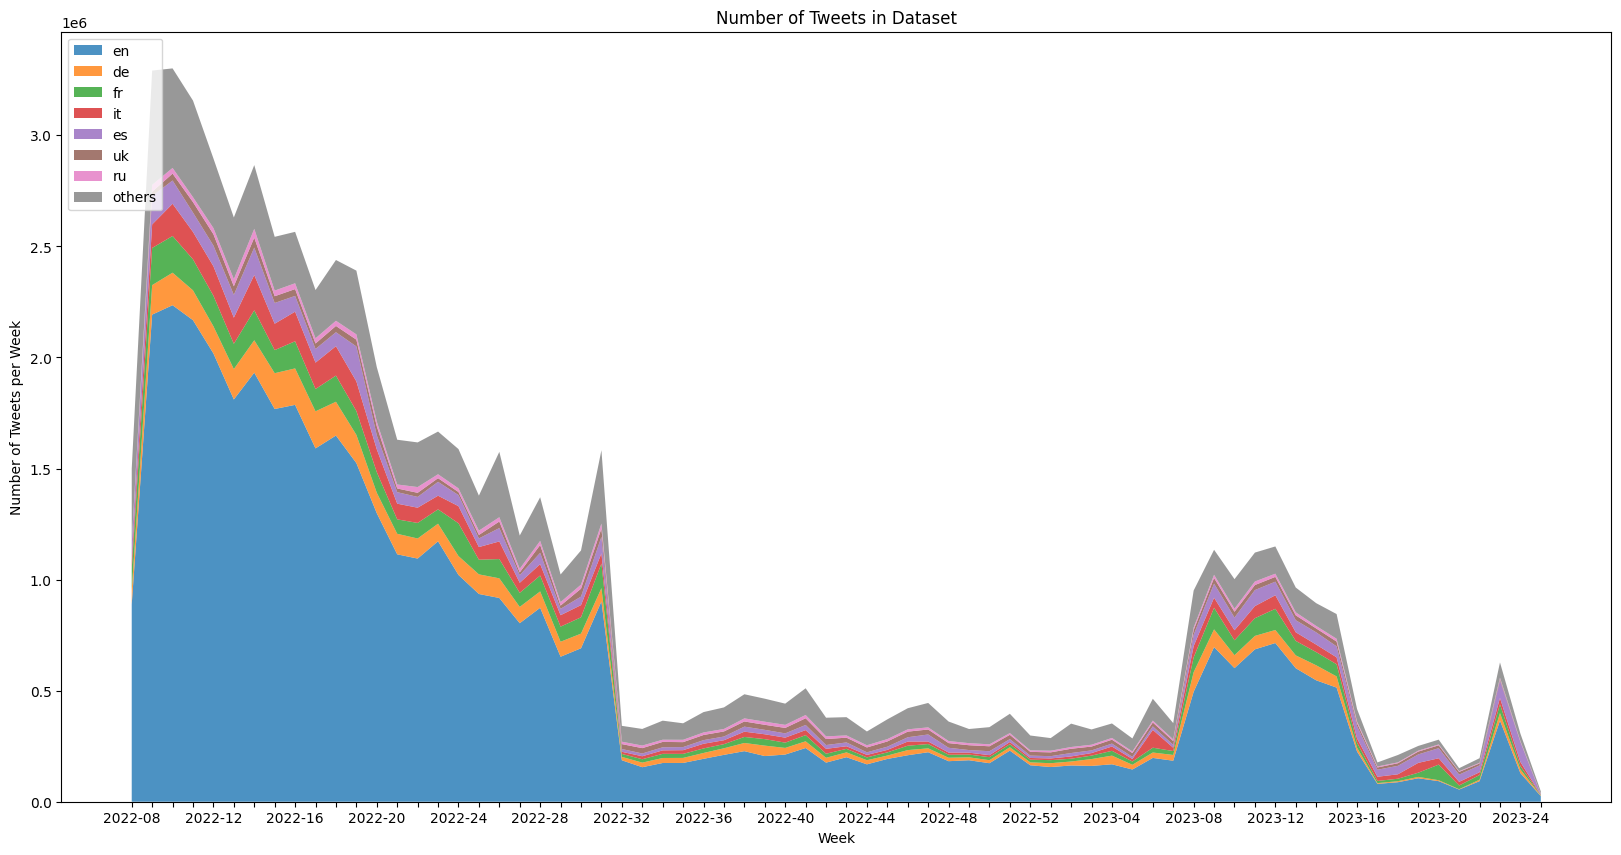

In [7]:
from src.first_exploration_02 import stackplot_languages_over_weeks

stackplot_languages_over_weeks(df_agg, selected_languages) 

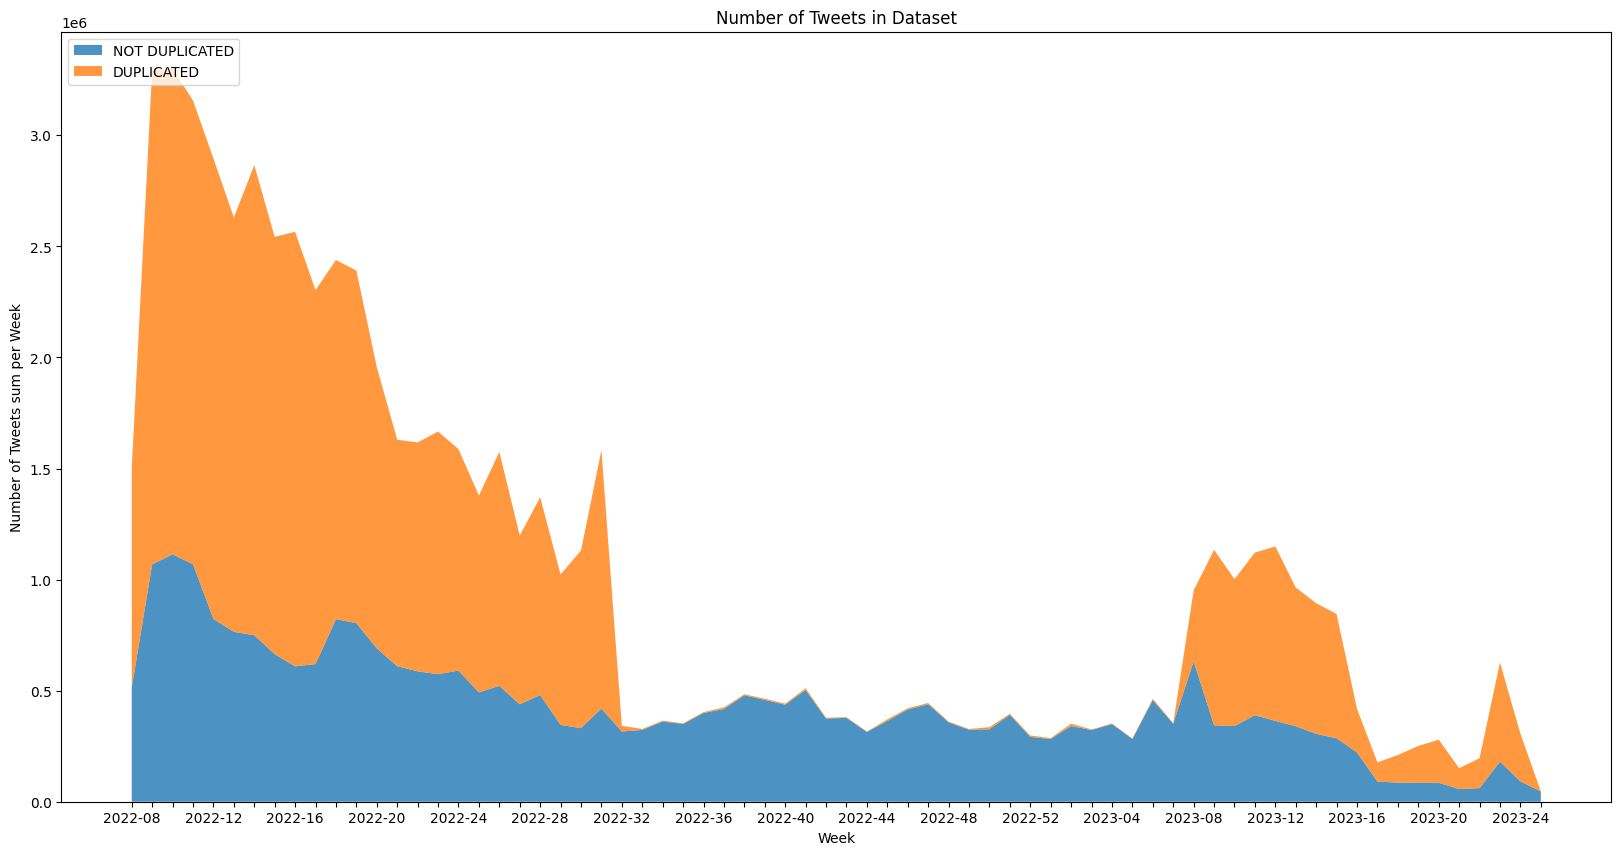

In [7]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks

stackplot_duplicates_over_weeks(df_agg)

Explanation:
[Link to Kaggle](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data)

The creator of this dataset states the following:

[Aug 09]
Significant drop in tweets extracted, but I am now getting ORIGINAL/ NON-RETWEETS.

[Aug 08]
I've noticed that I had a spike of Tweets extracted, but they are literally thousands of retweets of a single original tweet. I also noticed that my crawlers seem to deviate because of this tactic being used by some Twitter users where they flood Twitter with tweets using a hashtag like "#Ukraine" but also add their own hashtag in it. Starting tomorrow, all the extracted data I will be pulling out of twitter will be NON RETWEETS. I will observe on what will be the effect on the total tweets per day for this config change. 

And:

[Feb 26]
I've started to pull in RETWEETS again, so I am expecting a significant amount of throughput in tweets again on top of the dedicated processes that I have that gets NONRETWEETS. If you don't want RETWEETS, just filter them out. 


Which explains the drop of duplicated tweets around 2022-32 and the increase around 2023-08.

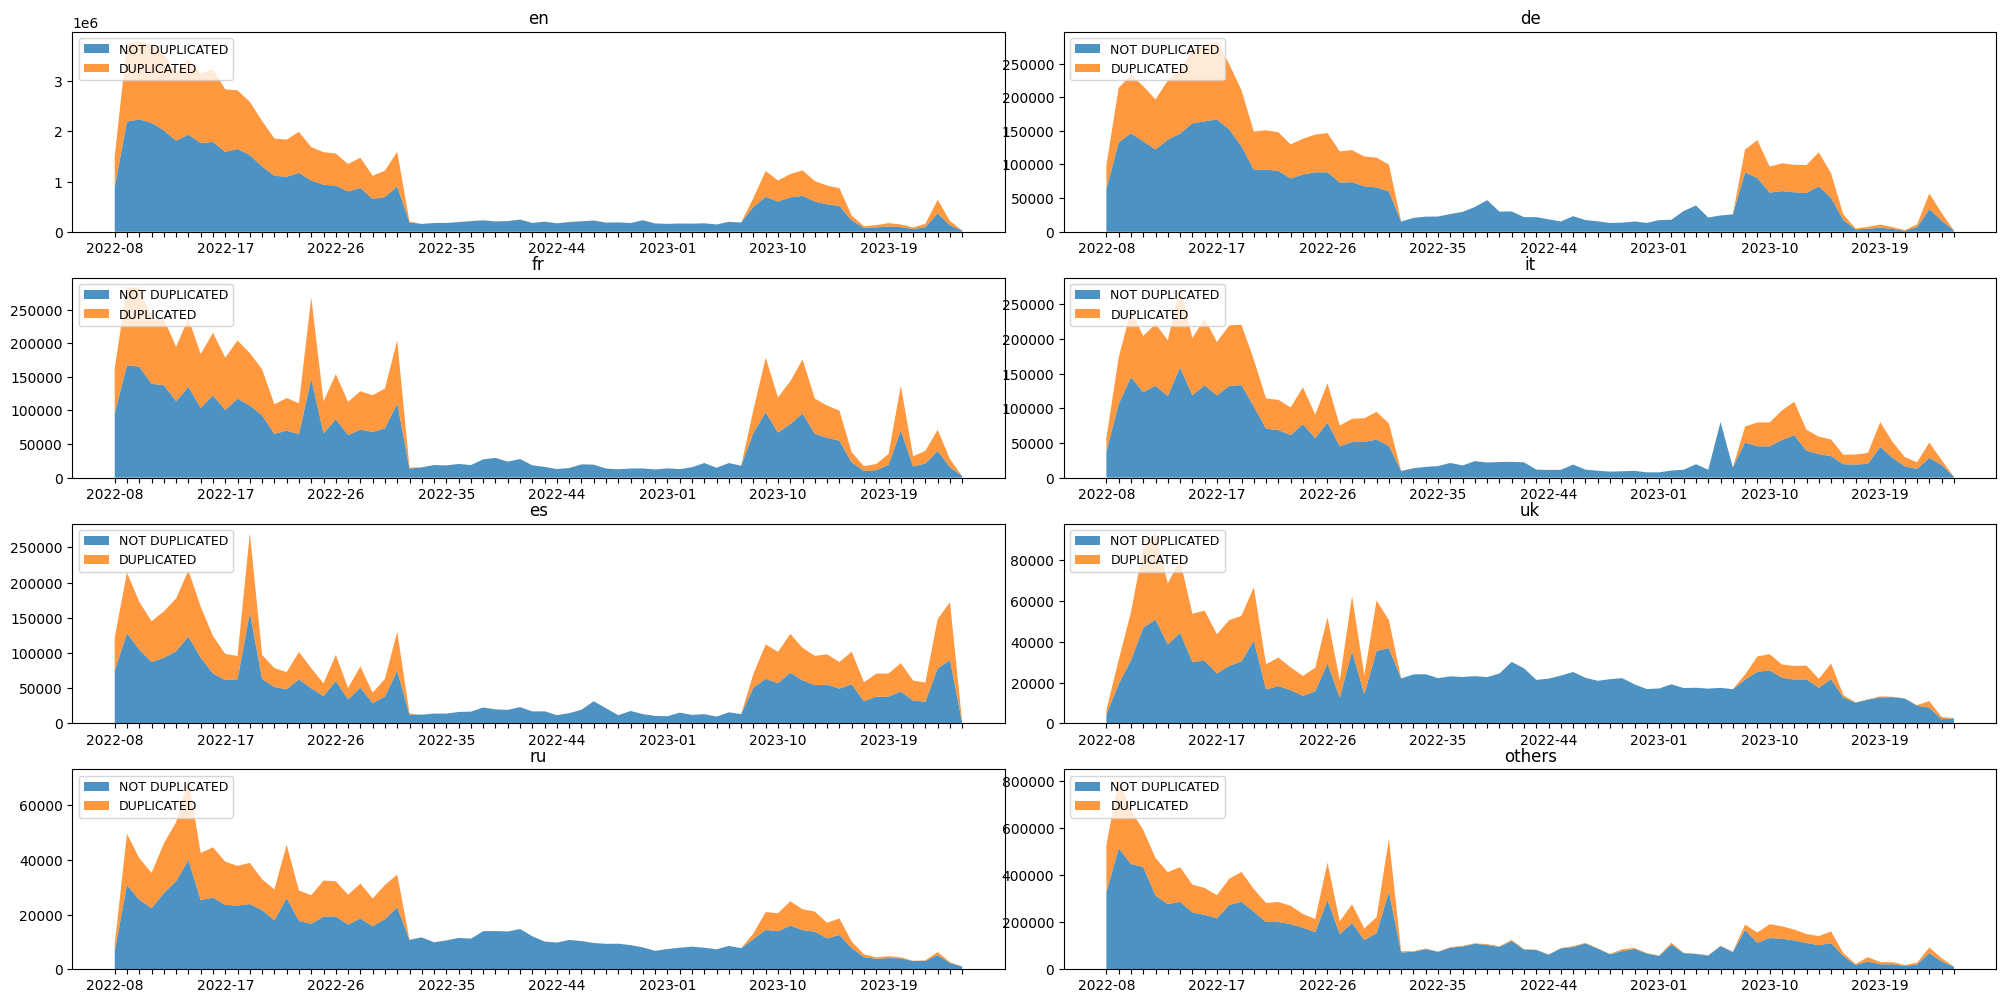

In [3]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks_multipl
    
stackplot_duplicates_over_weeks_multipl(df_agg, selected_languages)

## 03 Splitting data into languages

The csvs files will be split into single language files. This allows for better deduplication which only needs to look at one langauge at a time. Also for translation and languages specific exploration later on, this split is necessary. A separate csv file for 'en', 'de','fr','it','es','uk','ru' will be created. English is skipped here because its file is too big for one file.

In [129]:
import importlib
import src.spliting_languages_03
importlib.reload(src.spliting_languages_03)
from src.spliting_languages_03 import split_csvs_into_language, splits_csvs_only_english, language_csvs_quick_stats
import numpy as np


path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
path_to_languages = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"

selected_languages = np.array(['de','fr','it','es','uk','ru'])

#split_csvs_into_language(selected_languages, path_data, path_to_languages)
splits_csvs_only_english(path_data, path_to_languages)

language_csvs_quick_stats(path_to_languages)




  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [8:11:08<00:00, 61.91s/it]      


uk: 972.2352085 mb
es: 2053.303945 mb
it: 2086.324622 mb
de: 2565.441376 mb
fr: 2474.38873 mb
ru: 701.8336678 mb
en_1: 5313.855784 mb
en_0: 6291.764665 mb


Aggregate the dataframes to get a short overview if everything worked out.

In [48]:
from src.utility import aggregate_data
from src.spliting_languages_03 import aggregate_languages
import pandas as pd
path_to_lang_agg = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/lang_agg.csv"
path_to_languages = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"

#df_la_agg = aggregate_data(path_to_languages,path_to_lang_agg, aggregate_languages)
df_la_agg = pd.read_csv(path_to_lang_agg)



Language counts are the same as in Chapter 02. Except for english where already all tweets marked as retweets or tweets that are duplicated on a single file are filtered out. For duplicate count we get higher values because here duplicates are determined over the whole timespan instead for every single day.

In [15]:
df_la_agg[['la','count','dupl_count']]

,la,count,dupl_count
0,uk,1541110,565597
1,es,3113760,1969303
2,it,3262053,1990490
3,de,3872212,2176729
4,fr,3795086,2596867
5,ru,964087,423548
6,en,7559951,293104
7,en,8914144,449301


Delete duplicates from each language csv to make them smaller and easier to handle.

In [49]:
from src.utility import iterate_dataframes_path
from src.data_schemas import OrigDataSchema
for df, path in iterate_dataframes_path(path_to_languages):
    df['dupl'] = df.duplicated(subset=OrigDataSchema.TEXT) if  OrigDataSchema.IS_RETWEET not in df.columns else df.duplicated(subset=OrigDataSchema.TEXT) | df[OrigDataSchema.IS_RETWEET]
    df = df[~df['dupl']]
    df.dropna(subset="text").to_csv(path)


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [20:32<00:00, 154.12s/it]


Do a new aggregation of those smaller csvs to compare and see if everything worked out fine.

In [16]:
from src.utility import aggregate_data
from src.spliting_languages_03 import aggregate_languages
import pandas as pd
path_to_lang_agg_dedpl_1 = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/lang_agg_dedpl_1.csv"
path_to_languages = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"

#df_la_agg_1 = aggregate_data(path_to_languages,path_to_lang_agg_dedpl_1, aggregate_languages)
df_la_agg_1 = pd.read_csv(path_to_lang_agg_dedpl_1)

df_la_agg_1[['la','count','dupl_count']]

100%|██████████| 8/8 [20:13<00:00, 151.72s/it]


,la,count,dupl_count
0,uk,975513,0
1,es,1144457,0
2,it,1271563,0
3,de,1695483,0
4,fr,1198219,0
5,ru,540539,0
6,en,7266847,0
7,en,8464843,0


Load only ID and TEXT to make them even smaller and safe them to a new directory. Files are really small now, even english can be loaded into ram now as it is ~3.5 gb

In [35]:
import pandas as pd
import os
from src.data_schemas import OrigDataSchema
from src.spliting_languages_03 import language_csvs_quick_stats

path_to_target = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/"
path_to_lang = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"
for path in [x for x in os.listdir(path_to_lang) if x.endswith(".csv")]:

    df = pd.read_csv(path_to_lang + path, usecols=[OrigDataSchema.ID,OrigDataSchema.TEXT]).dropna(subset='text')
    df.to_csv(path_to_target + path)

language_csvs_quick_stats(path_to_target)

uk: 215.002737 mb
es: 260.2298365 mb
it: 285.6907043 mb
de: 412.5313845 mb
en:   3449.613 mb
fr: 275.7611208 mb
ru: 140.2899752 mb


Last check the rows of the dataframes again to make sure nothing went wrong:

In [36]:
from src.utility import iterate_dataframes_path
path_to_lang_min = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/"
for df, path in iterate_dataframes_path(path_to_lang_min, supress_tqdm=True):
    print(df.shape, path.split('/')[-1].split('.')[0])

 14%|█▍        | 1/7 [00:09<00:56,  9.45s/it]

(975513, 3) uk


 29%|██▊       | 2/7 [00:14<00:33,  6.66s/it]

(1154063, 3) es


 43%|████▎     | 3/7 [00:18<00:22,  5.68s/it]

(1335470, 3) it


 57%|█████▋    | 4/7 [00:25<00:17,  5.95s/it]

(1837628, 3) de


 57%|█████▋    | 4/7 [01:48<01:21, 27.19s/it]


KeyboardInterrupt: 

In [20]:
df.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/en.csv")

In [3]:
import dask.dataframe as dd
df_en_0 = dd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/en_0.csv").compute(dtype={'Unnamed: 0': 'float64',
       'Unnamed: 0.1': 'object',
       'Unnamed: 0.2': 'float64',
       'Unnamed: 0.5': 'object',
       'Unnamed: 0.6': 'object',
       'Unnamed: 0.7': 'object',
       'coordinates': 'object',
       'favorite_count': 'float64',
       'followers': 'object',
       'following': 'object',
       'in_reply_to_screen_name': 'object',
       'original_tweet_id': 'object',
       'original_tweet_userid': 'object',
       'quoted_status_username': 'object',
       'retweetcount': 'object',
       'totaltweets': 'float64',
       'tweetid': 'float64',
       'userid': 'object'})

/usr/local/lib/python3.11/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (0,1,2,5,7,11,12,17,23,24,25,26,30,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------------------+---------+----------+
| Column                  | Found   | Expected |
+-------------------------+---------+----------+
| Unnamed: 0              | float64 | int64    |
| Unnamed: 0.1            | object  | int64    |
| Unnamed: 0.2            | float64 | int64    |
| Unnamed: 0.5            | object  | int64    |
| Unnamed: 0.6            | object  | int64    |
| Unnamed: 0.7            | object  | int64    |
| coordinates             | object  | float64  |
| favorite_count          | float64 | int64    |
| followers               | object  | int64    |
| following               | object  | int64    |
| in_reply_to_screen_name | object  | float64  |
| original_tweet_id       | object  | float64  |
| original_tweet_userid   | object  | float64  |
| quoted_status_username  | object  | float64  |
| retweetcount            | object  | int64    |
| totaltweets             | float64 | int64    |
| tweetid                 | float64 | int64    |
| userid                  | object  | int64    |
+-------------------------+---------+----------+

The following columns also raised exceptions on conversion:

- Unnamed: 0.1
  ValueError('cannot convert float NaN to integer')
- Unnamed: 0.5
  ValueError('cannot convert float NaN to integer')
- Unnamed: 0.6
  ValueError('cannot convert float NaN to integer')
- Unnamed: 0.7
  ValueError("invalid literal for int() with base 10: '📉 WTI: $97.19 (-0.06)'")
- coordinates
  ValueError('could not convert string to float: "{\'type\': \'Point\', \'coordinates\': [34.08234, 51.65339]}"')
- followers
  ValueError('cannot convert float NaN to integer')
- following
  ValueError('cannot convert float NaN to integer')
- in_reply_to_screen_name
  ValueError("could not convert string to float: 'Cyberspec1'")
- original_tweet_id
  ValueError("could not convert string to float: 'UN_HRC'")
- original_tweet_userid
  ValueError("could not convert string to float: '2022-07-29 08:08:24.190633'")
- quoted_status_username
  ValueError("could not convert string to float: 'continentaltire'")
- retweetcount
  ValueError('cannot convert float NaN to integer')
- userid
  ValueError('cannot convert float NaN to integer')

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'Unnamed: 0': 'float64',
       'Unnamed: 0.1': 'object',
       'Unnamed: 0.2': 'float64',
       'Unnamed: 0.5': 'object',
       'Unnamed: 0.6': 'object',
       'Unnamed: 0.7': 'object',
       'coordinates': 'object',
       'favorite_count': 'float64',
       'followers': 'object',
       'following': 'object',
       'in_reply_to_screen_name': 'object',
       'original_tweet_id': 'object',
       'original_tweet_userid': 'object',
       'quoted_status_username': 'object',
       'retweetcount': 'object',
       'totaltweets': 'float64',
       'tweetid': 'float64',
       'userid': 'object'}

to the call to `read_csv`/`read_table`.

/usr/local/lib/python3.11/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (0,1,2,5,7,8,9,10,11,12,14,16,17,18,19,20,21,23,24,25,26,29,30,33,34,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (0,1,2,5,7,8,9,10,11,12,14,16,17,18,19,20,21,23,25,26,29,30,33,34,35,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


### Deduplication with hashes